In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

Для числового обчислення похідних використовуємо різницеві формули, що забезпечують порядок помилки не менше за h^2 - параметр, що передаємо в функції. Також в параметри передаємо розмірність - для можливості передачі функцій 2 та 3 аргументів.

Зокрема розглянемо оптимізацію функції Розенброка, яка в цілому має наступний вигляд:

$f(x,y) = (a-x)^2 + b(y-x^2)^2$

In [2]:
def function1(x, y):
  """
    Функція на R2
  """
  return x*x + 18*y*y + 0.01*x*y + x - y


def function2(x, y):
  """
    Ярна функція на R2
  """
  return (y-x**2)**2 + (1-x)**2


def function3(x, y, z):
  """
    Функція на R3
  """
  return 16*x*x + 15*y*y + 2*z*z + 0.018*x*y + x - z


def first_der(func, n, x, y, z, h):
  """
    Перші часткові похідні за означенням (числово)
  """
  if n == 2:
    return np.array([(func(x+h, y)-func(x-h, y))/(2*h),
                   (func(x, y+h)-func(x, y-h))/(2*h)])
  if n == 3:
    return np.array([(func(x+h, y, z)-func(x-h, y, z))/(2*h),
                   (func(x, y+h, z)-func(x, y-h, z))/(2*h),
                   (func(x, y, z+h)-func(x, y, z-h))/(2*h)])


def hessian_matrix(func, n, x, y, z, h):
  """
    Матриця Гессе (симетрична квадратична форма функції)
    обчислюємо часткові похідні 2го порядку числово
  """
  if n == 2:
    dxdx = (func(x+h, y)-2*func(x, y)+func(x-h, y))/(h*h)
    dydy = (func(x, y+h)-2*func(x, y)+func(x, y-h))/(h*h)
    dxdy = (func(x+h, y+h)-func(x+h, y-h)-func(x-h, y+h)+func(x-h, y-h))/(4*h*h)
    return np.array(
          [[dxdx, dxdy],
          [dxdy, dydy]])
    
  if n == 3:
    dxdx = (func(x+h, y, z)-2*func(x, y, z)+func(x-h, y, z))/(h*h)
    dydy = (func(x, y+h, z)-2*func(x, y, z)+func(x, y-h, z))/(h*h)
    dzdz = (func(x, y, z+h)-2*func(x, y, z)+func(x, y, z-h))/(h*h)
    dxdy = (func(x+h, y+h, z)-func(x+h, y-h, z)-func(x-h, y+h, z)+func(x-h, y-h, z))/(4*h*h)
    dydz = (func(x, y+h, z+h)-func(x, y+h, z-h)-func(x, y-h, z+h)+func(x, y-h, z-h))/(4*h*h)
    dxdz = (func(x+h, y, z+h)-func(x+h, y, z-h)-func(x-h, y, z+h)+func(x-h, y, z-h))/(4*h*h)
    return np.array(
          [[dxdx, dxdy, dxdz],
          [dxdy, dydy, dydz],
          [dxdz, dydz, dzdz]])

def droblennya(func, dim, x, y, z, b, l, dx, dy, dz = 0):
  """
    Метод дроблення
  """
  f = 0
  a = b
  while(f!=1):
    if dim == 2:
      if func(x-a*dx, y-a*dy) < func(x, y):
        f=1
    if dim == 3:
      if func(x-a*dx, y-a*dy, z-a*dz) < func(x, y, z):
        f=1
    a = a*l
  return a

По матриці Гессе, якщо вона визначена додатно, можемо зробити висновок, чи отримаємо ми безумовним градієнтним методом глобальний мінімум.

In [ ]:
# відключимо scientific notation
np.set_printoptions(suppress=True)
hessian_matrix(function1, 2, 1, 1, 1, 0.001)

array([[ 1.99999999,  0.01      ],
       [ 0.01      , 35.99999999]])

Візуалізуємо першу функцію.

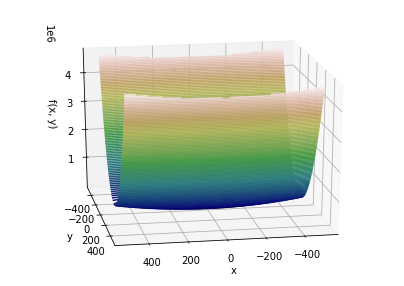

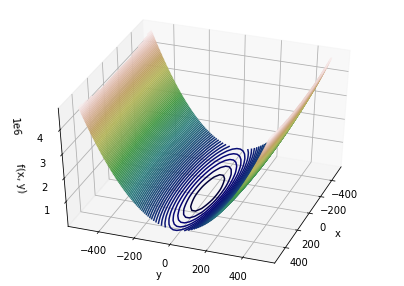

In [ ]:
x = np.linspace(-500, 500)
y = np.linspace(-500, 500)

X, Y = np.meshgrid(x, y)
Z = function1(X, Y)
fig = plt.figure(figsize = (7,5))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 100, cmap='gist_earth')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.view_init(20, 80)
plt.show()
ax.view_init(40, 20)
fig

Функція Розенброка унімодальна і неопукла, глобальний мінімум лежить у вузькій параболічній долині. Задача оптимізації не є тривіальною.

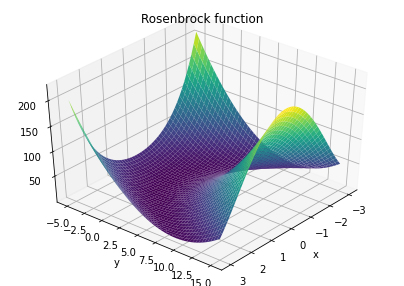

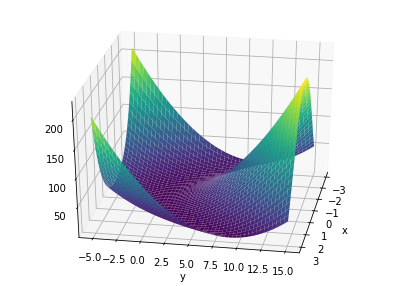

In [ ]:
x = np.linspace(-3, 3)
y = np.linspace(-5, 15)

X, Y = np.meshgrid(x, y)
Z = function2(X, Y)
fig = plt.figure(figsize = (7,5))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('Rosenbrock function')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.view_init(40, 40)
plt.show()
ax.set_title(None)
ax.view_init(30, 10)
fig

В функції реалізовано 2 методи пошуку довжини кроку, перший - дроблення кроку, другий - використання константного коефіцієнту спуску (в машинному навчанні це називається швидкістю навчання). Перший є скінченним процесом і може дати результат швидше, ніж другий метод, який також часто використовують при градієнтному спуску, обираючи швидкість навчання в межах від 0 до 1.

In [ ]:
def optimize(point, max_iter, function, h_diff, dim, step_method = 'droblennya', l = 0.5, b = 1, print_iters = 1):
  """
    Реалізація алгоритму методу
    :param point: точка в R2 або R3 у вигляді list
    :param max_iter: максимальна кількість ітерацій циклу спуску
    :param function: функція, яку мінімізуємо - повертає значення в точці
    :param h_diff: порядок помилки в різницевих формулах похідних
    :param dim: визначає розмірність - R2 або R3
    :param step_method: const або droblennya - метод дроблення
    :param l: коефіцієнт навчання при const або lambda в методі дроблення
    :param b: константа в методі дроблення
    :return: optima - точка оптимуму
             evolution - масив точок-наближень
  """
  if dim == 2:
    x, y = point[0], point[1]

    # масив векторів, значення координат на кожній ітерації
    evolution = [[x, y]]

    iters = max_iter
    for i in range(max_iter):
      if i % 5 == 0 and print_iters == 1:
        print("Ітерація %i, значення функції: %.5f в точці" %(i, function(x, y)), evolution[i])

      [dx, dy] = first_der(function, dim, x, y, 0, h_diff)

      if step_method == 'droblennya':
        alpha = droblennya(function, dim, x, y, 0, b, l, dx, dy)
      if step_method == 'const':
        alpha = l
      x = x - alpha * dx
      y = y - alpha * dy
      evolution = np.vstack((evolution, [[x, y]]))

      # умова ранньої зупинки
      if np.linalg.norm(evolution[i+1]-evolution[i]) < 10**(-4):
        iters = i
        break
        
    print("Кількість ітерацій %i, точка мінімуму" %(iters), evolution[-1])
    print("Отриманий мінімум функції: %.5f" %(function(x, y)))
    return [x, y], evolution

  if dim == 3:
    x, y, z = point[0], point[1], point[2]
        # масив векторів, значення координат на кожній ітерації
    evolution = [[x, y, z]]

    iters = max_iter
    for i in range(max_iter):
      if i % 5 == 0 and print_iters == 1:
        print("Ітерація %i, значення функції: %.5f в точці" %(i, function(x, y, z)), evolution[i])

      [dx, dy, dz] = first_der(function, dim, x, y, z, h_diff)

      if step_method == 'droblennya':
        alpha = droblennya(function, dim, x, y, z, b, l, dx, dy, dz)
      if step_method == 'const':
        alpha = l
      x = x - alpha * dx
      y = y - alpha * dy
      z = z - alpha * dz
      evolution = np.vstack((evolution, [[x, y, z]]))

      # умова ранньої зупинки
      if np.linalg.norm(evolution[i+1]-evolution[i]) < 10**(-4):
        iters = i
        break
    
    print("Кількість ітерацій %і, точка мінімуму" %(iters), evolution[-1])
    print("Отриманий мінімум функції: %.5f" %(function(x, y, z)))
    return [x, y, z], evolution

In [ ]:
def plot2D(x_linspace, y_linspace, func, evolution_w):
  """
    Побудова траєкторiї вектору ваг w(t) в площинi W.
  """
  x1 = x_linspace
  x2 = y_linspace
  X1, X2 = np.meshgrid(x1, x2)
  Z = func(X1, X2)
  fig = plt.figure(figsize = (7,5))
  contours = plt.contour(X1, X2, Z, 25, cmap='gist_earth')
  plt.clabel(contours, inline = True, fontsize = 10)
  plt.title("Ітераційний процес на лініях рівня функції", fontsize=12)
  plt.plot(evolution_w[:, 0], evolution_w[:, 1])
  plt.plot(evolution_w[:, 0], evolution_w[:, 1], '^', markerfacecolor='red', markersize=10, label = "Точки наближення")
  plt.xlabel('x', fontsize=11)
  plt.ylabel('y', fontsize=11)
  plt.colorbar()
  plt.legend(loc = "upper right")
  plt.show()

Перевіримо алгоритм для різних початкових точках. Ціль - знайти точку оптимуму, яку ми для перевірки знайшли вручну. Виведемо значення першої досліджуваної функції в цій точці:

In [ ]:
print("Мінімальне значення функції за варіантом, опуклої: ", function1(-0.5, 0.028))

Мінімальне значення функції за варіантом, опуклої:  475.25


Ітерація 0, значення функції: 0.00000 в точці [0, 0]
Ітерація 5, значення функції: -0.24010 в точці [-0.3455979   0.02938991]
Ітерація 10, значення функції: -0.26294 в точці [-0.46724362  0.02857144]
Ітерація 15, значення функції: -0.26392 в точці [-0.48963623  0.02804079]
Ітерація 20, значення функції: -0.26402 в точці [-0.49782937  0.02772129]
Ітерація 25, значення функції: -0.26403 в точці [-0.49964784  0.02783136]
Кількість ітерацій 25, точка мінімуму [-0.4996632   0.02787929]
Отриманий мінімум функції: -0.26403


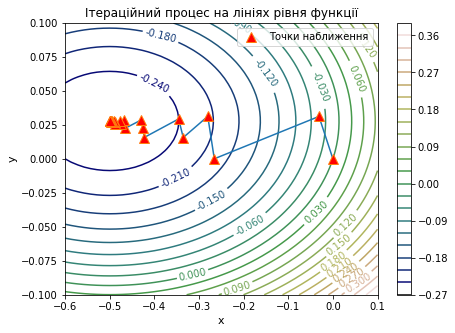

In [ ]:
[x, y], evolution = optimize([0, 0], max_iter = 50, function = function1, h_diff = 0.001, dim = 2,
                           step_method = 'droblennya', l = 0.5, b = 1)


plot2D(np.linspace(-0.6, 0.1, 50), np.linspace(-0.1, 0.1, 50), function1, evolution)

Ітерація 0, значення функції: 190100.00000 в точці [100, 100]
Ітерація 5, значення функції: 3095.31257 в точці [42.3193709   8.38948797]
Ітерація 10, значення функції: 312.28026 в точці [17.15828767 -0.17763567]
Ітерація 15, значення функції: 16.51639 в точці [3.384043  0.3335738]
Ітерація 20, значення функції: 0.74382 в точці [0.32667084 0.16189852]
Ітерація 25, значення функції: -0.14758 в точці [-0.15916598  0.02460498]
Ітерація 30, значення функції: -0.25860 в точці [-0.4439452   0.03914024]
Ітерація 35, значення функції: -0.26349 в точці [-0.4769655   0.02764096]
Ітерація 40, значення функції: -0.26400 в точці [-0.49504216  0.028327  ]
Ітерація 45, значення функції: -0.26403 в точці [-0.49905452  0.02809655]
Кількість ітерацій 48, точка мінімуму [-0.49966226  0.02795105]
Отриманий мінімум функції: -0.26403


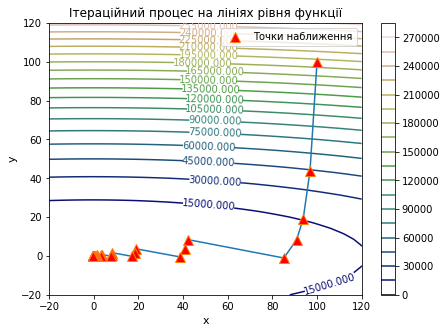

In [ ]:
[x, y], evolution = optimize([100, 100], max_iter = 100, function = function1, h_diff = 0.001, dim = 2,
                           step_method = 'droblennya', l = 0.5, b = 1)


plot2D(np.linspace(-20, 120, 50), np.linspace(-20, 120, 50), function1, evolution)

Ітерація 0, значення функції: 19010000.00000 в точці [1000, 1000]
Ітерація 5, значення функції: 307981.45552 в точці [425.77666489  83.66512251]
Ітерація 10, значення функції: 30975.41955 в точці [175.29299022  -2.02787506]
Ітерація 15, значення функції: 1664.37496 в точці [38.16766981  3.08530561]
Ітерація 20, значення функції: 99.92541 в точці [7.73092344 1.36808117]
Ітерація 25, значення функції: 11.27695 в точці [ 2.89431995 -0.00520411]
Ітерація 30, значення функції: 0.27642 в точці [0.05928676 0.14018093]
Ітерація 35, значення функції: -0.21067 в точці [-0.26943697  0.0251589 ]
Ітерація 40, значення функції: -0.26115 в точці [-0.44939374  0.03202077]
Ітерація 45, значення функції: -0.26385 в точці [-0.48933751  0.02971559]
Ітерація 50, значення функції: -0.26401 в точці [-0.49568485  0.02787228]
Ітерація 55, значення функції: -0.26403 в точці [-0.49919135  0.02789756]
Кількість ітерацій 56, точка мінімуму [-0.49947285  0.02790826]
Отриманий мінімум функції: -0.26403


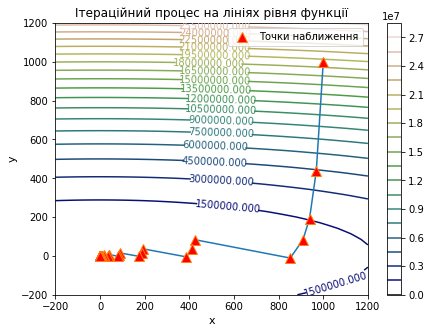

In [ ]:
[x, y], evolution = optimize([1000, 1000], max_iter = 100, function = function1, h_diff = 0.001, dim = 2,
                           step_method = 'droblennya', l = 0.5, b = 1)


plot2D(np.linspace(-200, 1200, 50), np.linspace(-200, 1200, 50), function1, evolution)

Ітерація 0, значення функції: 1901000000.00000 в точці [10000, 10000]
Ітерація 5, значення функції: 30782452.82881 в точці [4260.349605   836.4214669]
Ітерація 10, значення функції: 3094787.52506 в точці [1756.64001512  -20.53026895]
Ітерація 15, значення функції: 166329.93888 в точці [386.00393778  30.60262358]
Ітерація 20, значення функції: 10012.74622 в точці [81.77344945 13.42990763]
Ітерація 25, значення функції: 1152.79690 в точці [33.42917931 -0.303295  ]
Ітерація 30, значення функції: 53.75340 в точці [5.09160641 1.15058779]
Ітерація 35, значення функції: 5.06661 в точці [1.80584826 0.00033831]
Ітерація 40, значення функції: 0.02378 в точці [0.00709044 0.06895843]
Ітерація 45, значення функції: -0.24653 в точці [-0.39216748  0.045906  ]
Ітерація 50, значення функції: -0.26204 в точці [-0.45561235  0.02747244]
Ітерація 55, значення функції: -0.26394 в точці [-0.49066151  0.02772528]
Ітерація 60, значення функції: -0.26402 в точці [-0.49711331  0.02787971]
Кількість ітерацій 64, 

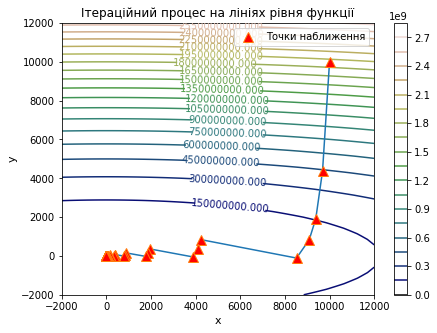

In [ ]:
[x, y], evolution = optimize([10000, 10000], max_iter = 100, function = function1, h_diff = 0.001, dim = 2,
                           step_method = 'droblennya', l = 0.5, b = 1)


plot2D(np.linspace(-2000, 12000, 50), np.linspace(-2000, 12000, 50), function1, evolution)

Ітерація 0, значення функції: 190100000000.00000 в точці [100000, 100000]
Ітерація 5, значення функції: 3078088147.38110 в точці [42606.07889295  8363.98489773]
Ітерація 10, значення функції: 309450980.99510 в точці [17570.11029683  -205.55420872]
Ітерація 15, значення функції: 16631683.50012 в точці [3864.36662584  305.77580677]
Ітерація 20, значення функції: 1001241.44500 в точці [822.19871111 134.04817367]
Ітерація 25, значення функції: 115295.46358 в точці [338.77777353  -3.28420393]
Ітерація 30, значення функції: 5401.20855 в точці [55.41480294 11.2546565 ]
Ітерація 35, значення функції: 532.75152 в точці [22.55870068 -0.24786766]
Ітерація 40, значення функції: 28.51468 в точці [4.57193232 0.43833507]
Ітерація 45, значення функції: 1.48612 в точці [0.57953284 0.20781013]
Ітерація 50, значення функції: -0.06544 в точці [-0.05488725  0.02347405]
Ітерація 55, значення функції: -0.25498 в точці [-0.40536311  0.02600246]
Ітерація 60, значення функції: -0.26311 в точці [-0.46987825  0.0

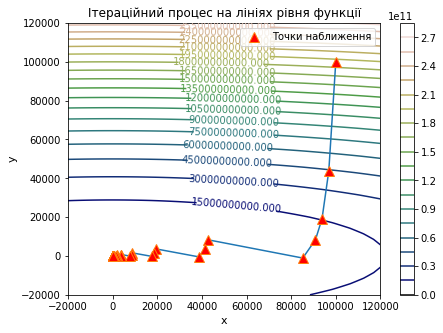

In [ ]:
[x, y], evolution = optimize([100000, 100000], max_iter = 100, function = function1, h_diff = 0.001, dim = 2,
                           step_method = 'droblennya', l = 0.5, b = 1)


plot2D(np.linspace(-20000, 120000, 50), np.linspace(-20000, 120000, 50), function1, evolution)

Тепер розглянемо функцію Розенброка. Її мінімум дорівнює 0, а відповідна точка має координати [1, 1]. Подивимося, як спрацює звичайний спуск, а потім імплементуємо ярний метод.

Кількість ітерацій 248, точка мінімуму [1.00044209 1.00112869]
Отриманий мінімум функції: 0.00000


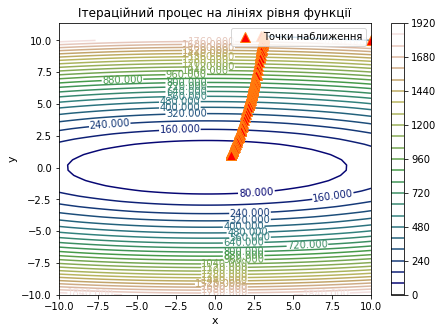

In [ ]:
[x, y], evolution = optimize([10, 10], max_iter = 1000, function = function2, h_diff = 0.001, dim = 2,
                           step_method = 'droblennya', l = 0.5, b = 1, print_iters = 0)


plot2D(np.linspace(-10, 10, 50), np.linspace(-10, 10, 50), function1, evolution)

Кількість ітерацій 11649, точка мінімуму [1.00042606 1.00108959]
Отриманий мінімум функції: 0.00000


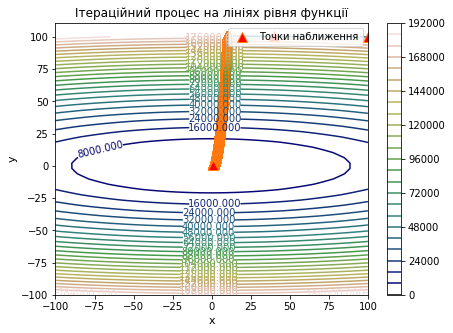

In [ ]:
[x, y], evolution = optimize([100, 100], max_iter = 100000, function = function2, h_diff = 0.001, dim = 2,
                           step_method = 'droblennya', l = 0.5, b = 1, print_iters = 0)


plot2D(np.linspace(-100, 100, 50), np.linspace(-100, 100, 50), function1, evolution)

In [ ]:
def yarniy_method(point1, point2, max_iter, function, t):
  [x0, y0], _ = optimize(point1, max_iter, function, 0.001, 2,
                         'droblennya', 0.5, 1, 0)
  [x1, y1], _ = optimize(point2, max_iter, function, 0.001, 2,
                         'droblennya', 0.5, 1, 0)


  if np.abs(function(x0, y0) - function(x1, y1)) > 10**(-4):
    norm = np.linalg.norm(np.array([x1, y1])-np.array([x0, y0]))
    [v, w] = [x1 - ((x1-x0)/norm)*t*np.sign(function(x1, y1)-function(x0, y0)),
                y1 - ((y1-y0)/norm)*t*np.sign(function(x1, y1)-function(x0, y0))]
    [x2, y2], _ = optimize([v, w], max_iter, function, 0.001, 2,
                          'droblennya', 0.5, 1, 0)
    return yarniy_method([x1, y1], [x2, y2], max_iter, function, t)

  return [x0, y0]

В ярному методі будуємо послідовність точок, по яким запускаємо градієнтний метод та робимо ярний крок. Останньою виводиться остаточно отримана точка мінімуму.

In [ ]:
[x_min, y_min] = yarniy_method(point1=[10, 10], point2=[5, 5], max_iter=100,
              function=function2, t=0.5)
print("Точка мінімуму:", np.around([x_min, y_min], 3))

Кількість ітерацій 100, точка мінімуму [2.26042718 5.48989271]
Отриманий мінімум функції: 1.73335
Кількість ітерацій 100, точка мінімуму [1.02135887 1.05479004]
Отриманий мінімум функції: 0.00059
Кількість ітерацій 75, точка мінімуму [0.99947888 0.99880347]
Отриманий мінімум функції: 0.00000
Кількість ітерацій 54, точка мінімуму [1.00044867 1.00114686]
Отриманий мінімум функції: 0.00000
Кількість ітерацій 1, точка мінімуму [0.99954386 0.99895259]
Отриманий мінімум функції: 0.00000
Точка мінімуму: [1.    0.999]


In [ ]:
[x_min, y_min] = yarniy_method(point1=[100, 100], point2=[500, 500], max_iter=1000,
              function=function2, t=5)
print("Точка мінімуму:", np.around([x_min, y_min], 3))

Кількість ітерацій 1000, точка мінімуму [ 9.86123422 97.70396557]
Отриманий мінімум функції: 78.73310
Кількість ітерацій 1000, точка мінімуму [ 22.11103308 489.37426441]
Отриманий мінімум функції: 445.90275
Кількість ітерацій 1000, точка мінімуму [ 21.88443085 479.37386925]
Отриманий мінімум функції: 436.35797
Кількість ітерацій 1000, точка мінімуму [ 21.94721631 482.17390152]
Отриманий мінімум функції: 439.02951
Кількість ітерацій 1000, точка мінімуму [ 21.78917312 475.25194383]
Отриманий мінімум функції: 432.42386
Кількість ітерацій 1000, точка мінімуму [ 21.60179154 467.15209928]
Отриманий мінімум функції: 424.69873
Кількість ітерацій 1000, точка мінімуму [ 21.68981572 470.93139954]
Отриманий мінімум функції: 428.30205
Кількість ітерацій 1000, точка мінімуму [ 21.54455715 464.6542861 ]
Отриманий мінімум функції: 422.31536
Кількість ітерацій 1000, точка мінімуму [ 21.38941292 457.98618887]
Отриманий мінімум функції: 415.95780
Кількість ітерацій 1000, точка мінімуму [ 21.49013445 462.